In [125]:
import cv2
import glob
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 10]

../img/raw/patient0091_OS.jpeg


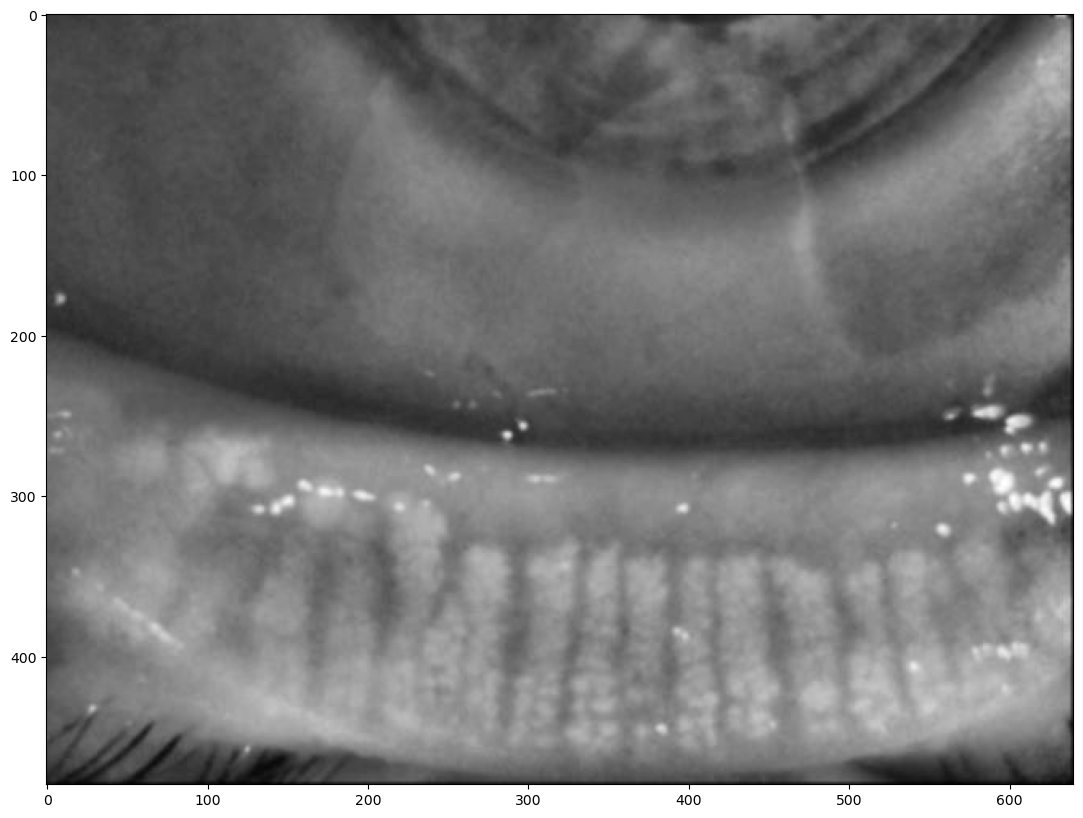

In [146]:
img_no = 183
filelist = sorted(glob.glob('../img/raw/*.jpeg'))
img_bgr = cv2.imread(filelist[img_no])
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
print(filelist[img_no])
imshow(img, cmap = 'gray')

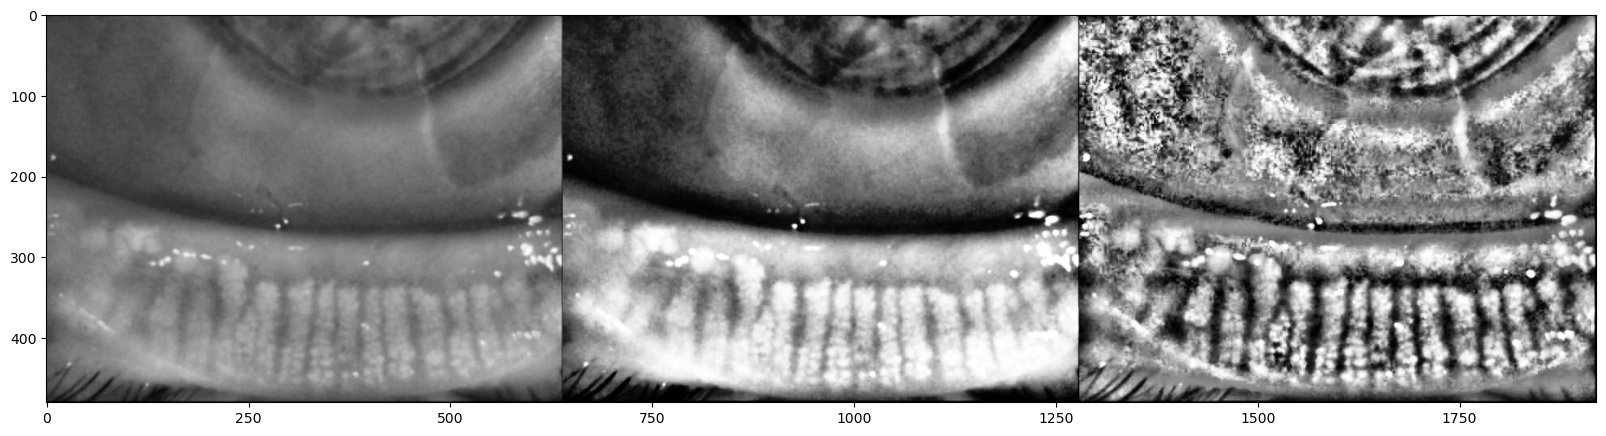

In [148]:
# Hist Eq
res_heq = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=80.0, tileGridSize=(16,16))
res_clahe = clahe.apply(img)
imshow(cv2.hconcat([img, res_heq, res_clahe]), cmap='gray')

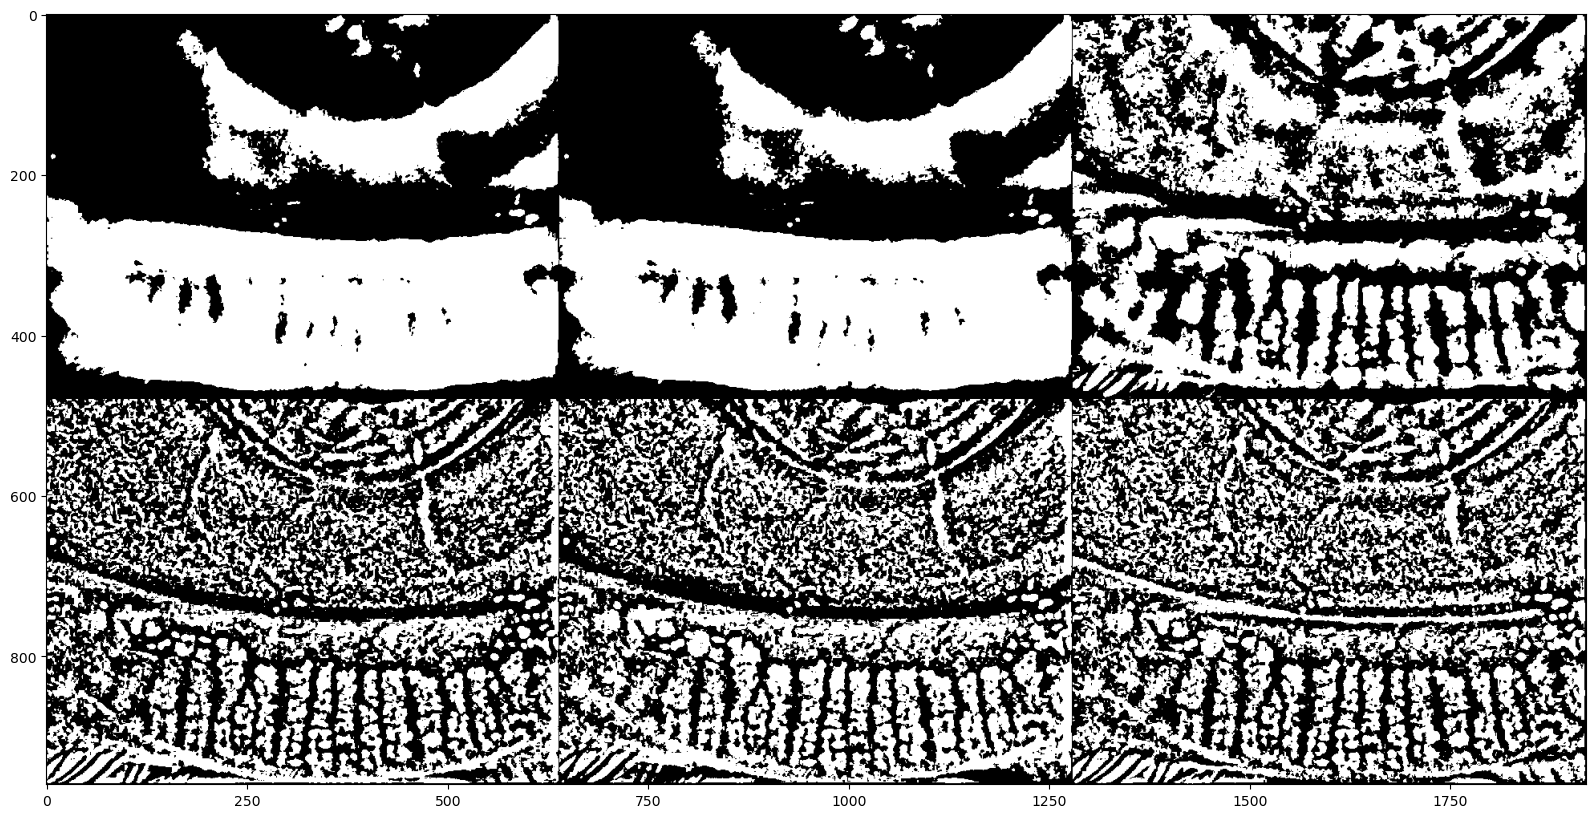

In [149]:
# Thresholding
thr, res_thr_img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
thr, res_thr_heq = cv2.threshold(res_heq, 0, 255, cv2.THRESH_OTSU)
thr, res_thr_clahe = cv2.threshold(res_clahe, 0, 255, cv2.THRESH_OTSU)

# Adaptive Threshold
res_athr_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize = 31, C = 0)
res_athr_heq = cv2.adaptiveThreshold(res_heq, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize = 31, C = 0)
res_athr_clahe = cv2.adaptiveThreshold(res_clahe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize = 31, C = 0)
imshow(cv2.vconcat([cv2.hconcat([res_thr_img, res_thr_heq, res_thr_clahe]) ,cv2.hconcat([res_athr_img, res_athr_heq, res_athr_clahe])]), cmap = 'gray')

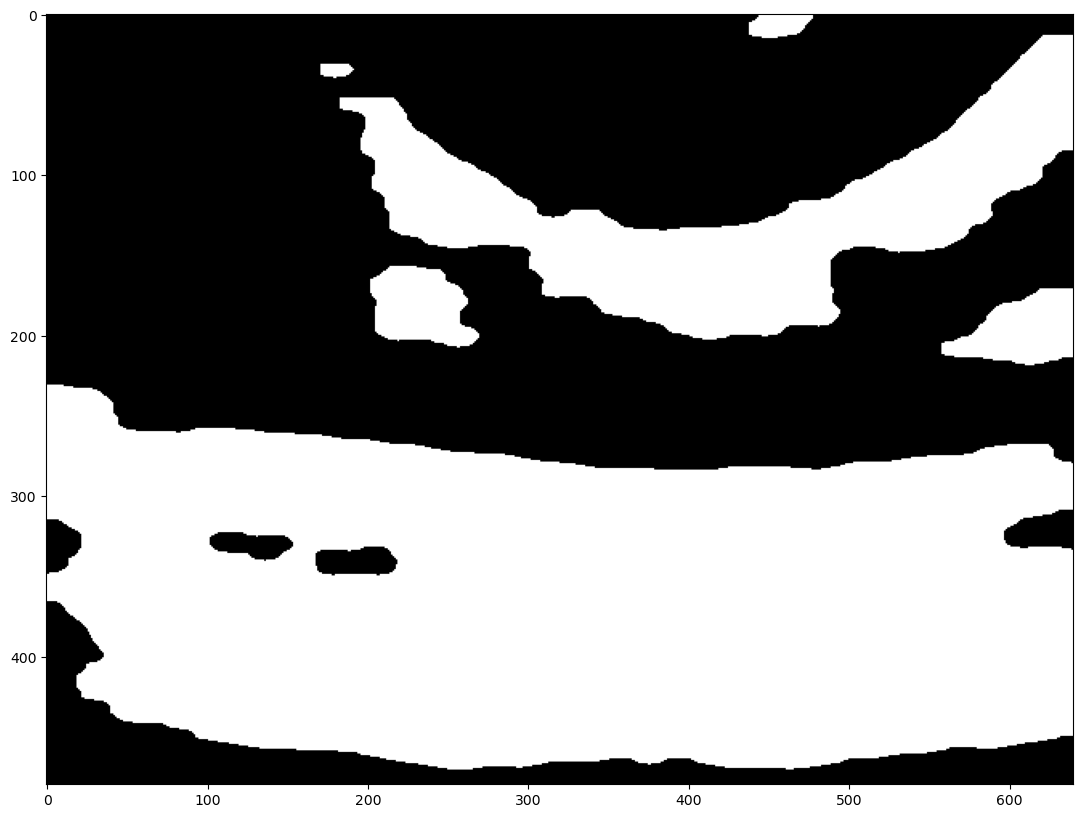

In [150]:
# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,10))
res_mor = cv2.morphologyEx(res_thr_img, cv2.MORPH_OPEN, kernel=kernel)
res_mor2 = cv2.morphologyEx(res_mor, cv2.MORPH_CLOSE, kernel=kernel)
imshow(res_mor2, cmap='gray')

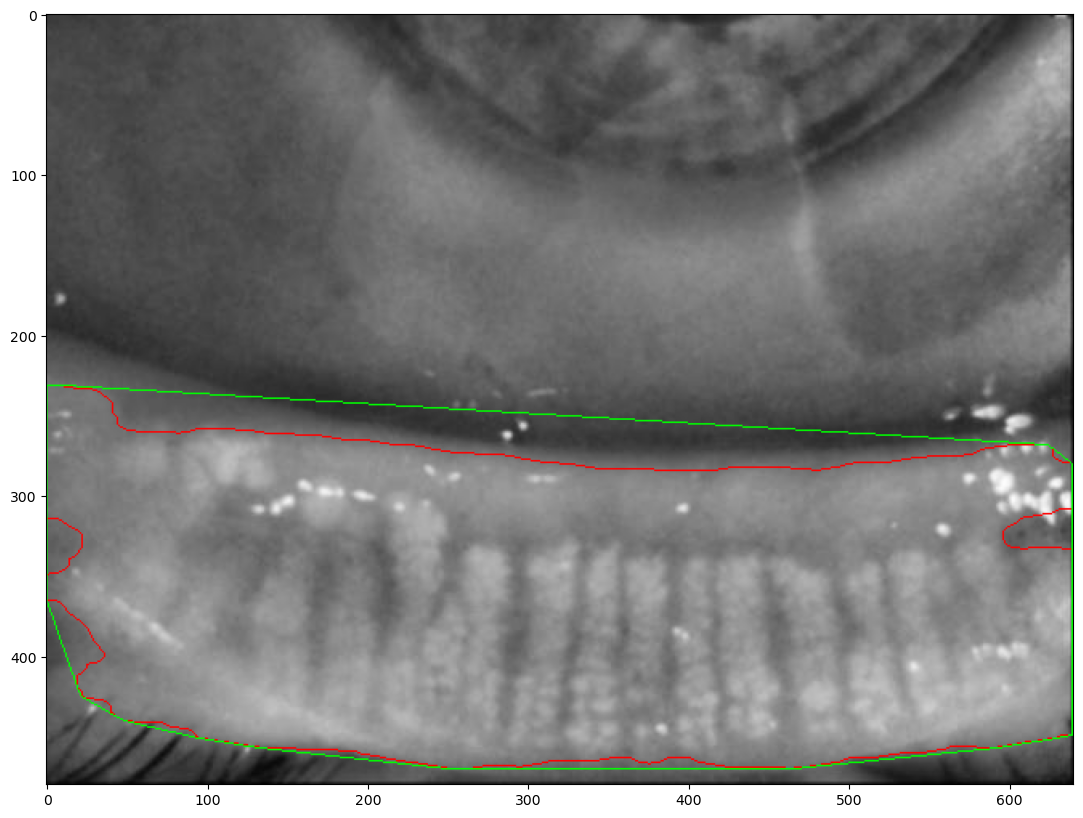

In [154]:
# Blob detector
cnts, _ = cv2.findContours(res_mor2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
mask_cnt = np.zeros(img.shape, dtype=np.uint8)
mask_hull = np.zeros(img.shape, dtype=np.uint8)
res_cnt = img_bgr.copy()
if len(cnts) != 0:
    sorted_cnts = sorted(cnts, key = cv2.contourArea, reverse=True)
    max_cnt = sorted_cnts[0]
    max_hull = cv2.convexHull(max_cnt)    
    cv2.drawContours(mask_cnt, [max_cnt], -1, 255, thickness=cv2.FILLED)
    cv2.drawContours(mask_hull, [max_hull], -1, 255, thickness=cv2.FILLED)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50))
    mask_cnt2 = cv2.morphologyEx(mask_cnt, cv2.MORPH_CLOSE, kernel=kernel, borderValue=0)  
    mask_cnt3 = cv2.morphologyEx(mask_cnt, cv2.MORPH_DILATE, kernel=kernel, borderValue=0) 
    cv2.drawContours(res_cnt, [max_cnt], -1, [255, 0, 0], thickness=1)
    cv2.drawContours(res_cnt, [max_hull], -1, [0, 255, 0], thickness=1)
imshow(res_cnt)

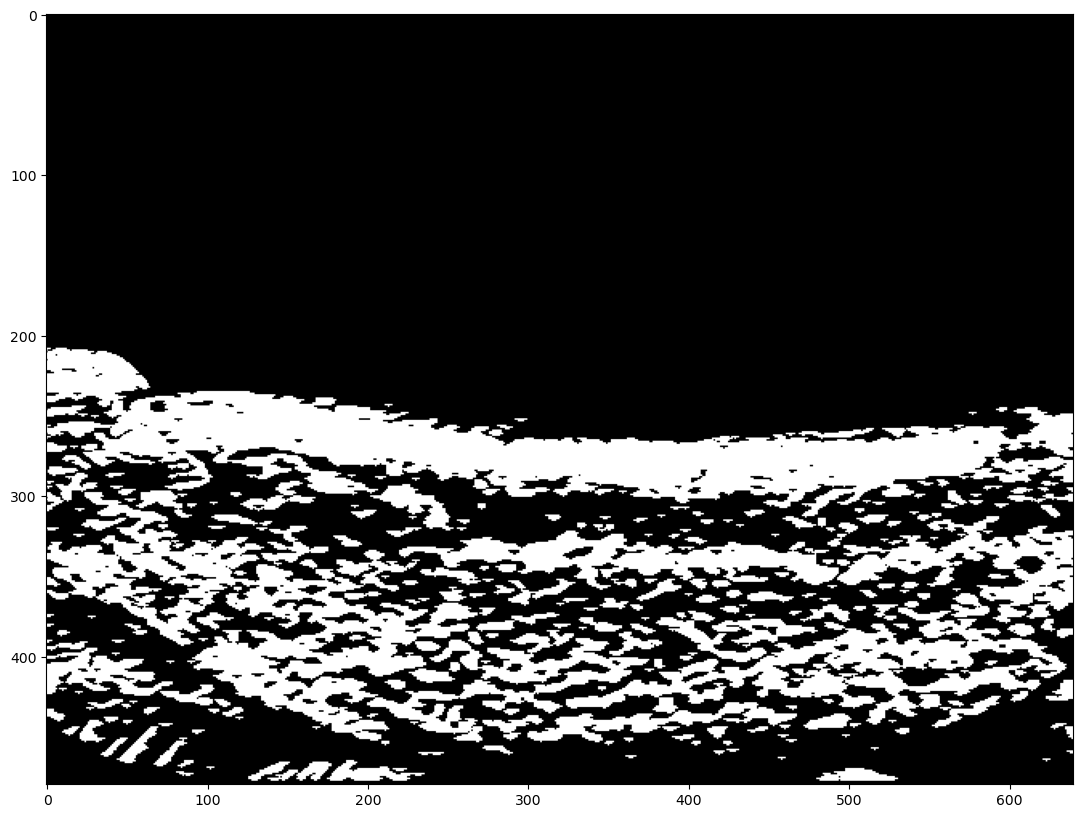

In [168]:
# Sobel Filtering
res_sbl = cv2.Sobel(img, dx=0, dy=1, ddepth=-1, ksize=3)
_, res_sbl2 = cv2.threshold(res_sbl*mask_cnt3, 10, 255, cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,2))
res_sbl_mor = cv2.morphologyEx(res_sbl2, cv2.MORPH_OPEN, kernel=kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
res_sbl_mor2 = cv2.morphologyEx(res_sbl_mor, cv2.MORPH_CLOSE, kernel=kernel)
cnts, _ = cv2.findContours(res_sbl_mor2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
mask_cnt = np.zeros(img.shape, dtype=np.uint8)
mask_hull = np.zeros(img.shape, dtype=np.uint8)
res_cnt = img_bgr.copy()
if len(cnts) != 0:
    sorted_cnts = sorted(cnts, key = cv2.contourArea, reverse=True)
    max_cnt = sorted_cnts[0]
    max_hull = cv2.convexHull(max_cnt)    
    cv2.drawContours(mask_cnt, [max_cnt], -1, 255, thickness=cv2.FILLED)
    cv2.drawContours(mask_hull, [max_hull], -1, 255, thickness=cv2.FILLED)
    cv2.drawContours(res_cnt, [max_cnt], -1, [255, 0, 0], thickness=1)
    cv2.drawContours(res_cnt, [max_hull], -1, [0, 255, 0], thickness=1)

imshow(res_sbl_mor, cmap='gray')